In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [3]:
data=pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27820.0,1.844794e+06,3.911779e+06,278.000,97498.500,430150.000,1486143.250,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05


In [11]:
t=data.isnull().sum()/len(data)

print(t.sort_values(ascending=False))

HDI for year          0.699353
generation            0.000000
gdp_per_capita ($)    0.000000
 gdp_for_year ($)     0.000000
country-year          0.000000
suicides/100k pop     0.000000
population            0.000000
suicides_no           0.000000
age                   0.000000
sex                   0.000000
year                  0.000000
country               0.000000
dtype: float64


**It has more than 50% of values so dropping the HDI of year column**

In [13]:
data.drop(columns=['HDI for year'],inplace=True)

In [15]:
data.drop(columns=['country-year'],inplace=True)

In [16]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [26]:
def unique_values(x):
    tf=data[x].unique()
    print('The column name:',x)
    print('The unique column names\n',tf)
    print('The total number of unique values',len(tf))
    print('\n')

In [27]:
t=data.columns
for i in range(len(t)):
    unique_values(t[i])

The column name: country
The unique column names
 ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seyc

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'count of sucides')

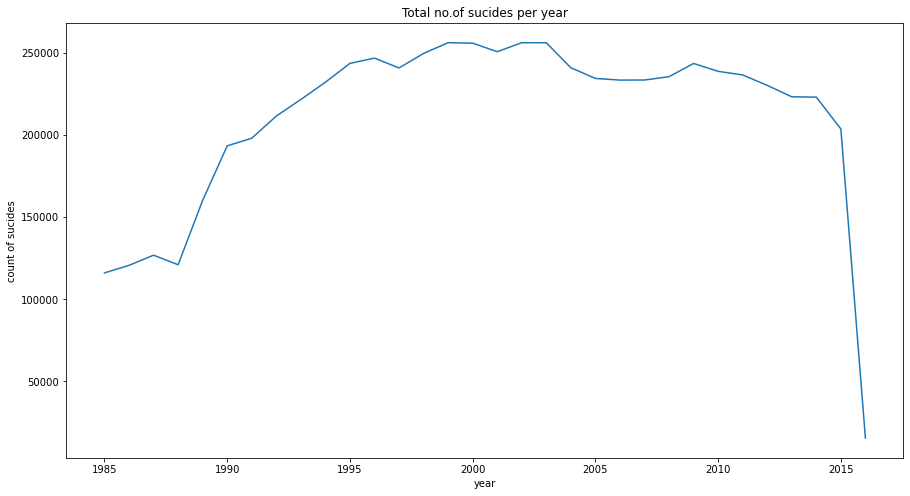

In [46]:
sucide_year=pd.DataFrame(data['suicides_no'].groupby([data['year']]).sum())
sucide_year=sucide_year.reset_index()
plt.figure(figsize=(15,8))
plt.title('Total no.of sucides per year')
sns.lineplot(x='year',y='suicides_no',data=sucide_year)
plt.ylabel('count of sucides')


Text(0, 0.5, 'count of sucides')

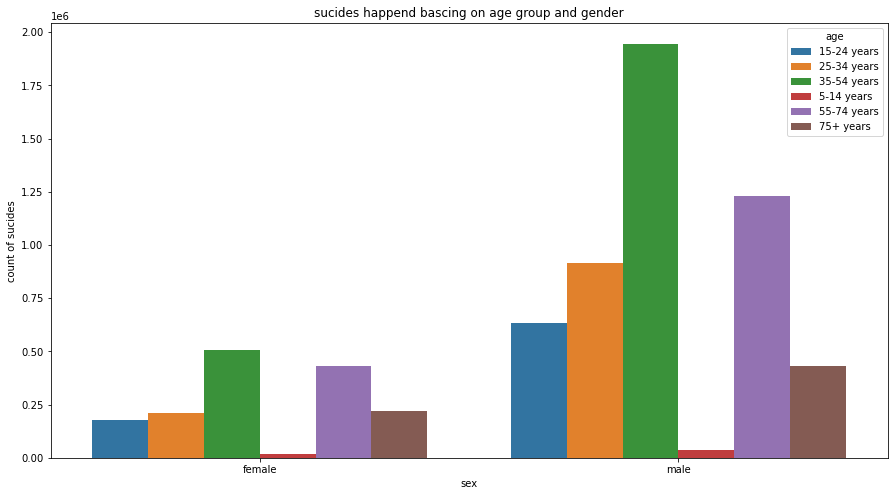

In [58]:
sucide_sex=pd.DataFrame(data['suicides_no'].groupby([data['sex'],data['age']]).sum())
sucide_sex=sucide_sex.reset_index()
plt.figure(figsize=(15,8))
plt.title("sucides happend bascing on age group and gender")
sns.barplot(x='sex',y='suicides_no',hue='age',data=sucide_sex,estimator=sum)
plt.ylabel('count of sucides')


In [63]:
male_population=data.loc[data.loc[:,'sex']=='male']
female_population=data.loc[data.loc[:,'sex']=='female']

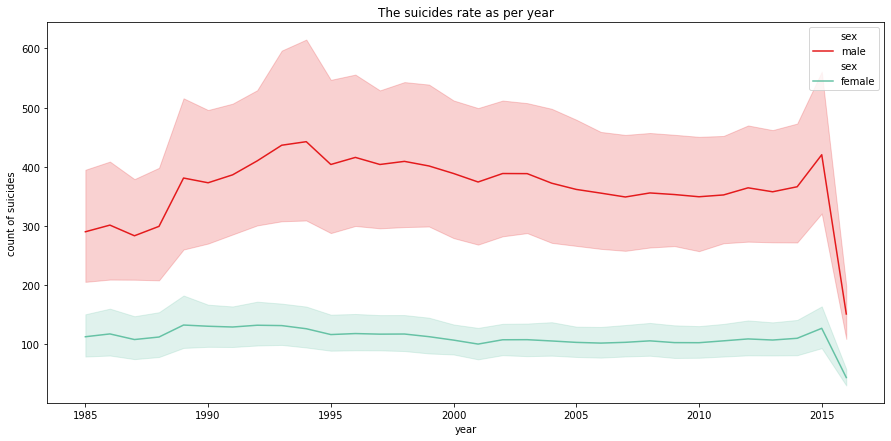

In [71]:
plt.figure(figsize=(15,7))
plt.title('The suicides rate as per year')
sns.lineplot(x='year',y='suicides_no',hue='sex',data=male_population,palette='Set1')
sns.lineplot(x='year',y='suicides_no',hue='sex',data=female_population,palette='Set2')
plt.ylabel('count of suicides')
plt.show()

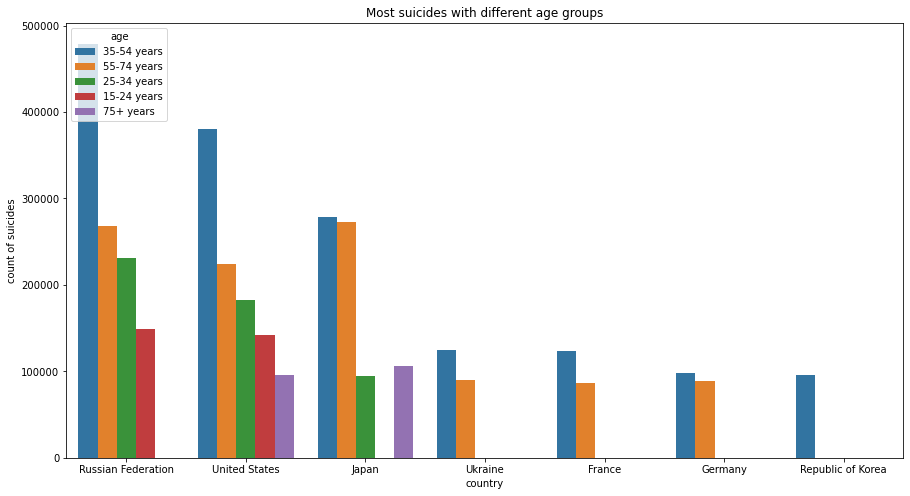

In [92]:
suicide_country_age =pd.DataFrame(data['suicides_no'].groupby([data['country'],data['age']]).sum())
suicide_country_age=suicide_country_age.reset_index().sort_values(by='suicides_no',ascending=False)
most_count_c=suicide_country_age.head(20)
plt.figure(figsize=(15,8))
plt.title('Most suicides with different age groups')
sns.barplot(x='country',y='suicides_no',hue='age',data=most_count_c)
plt.ylabel('count of suicides')
plt.show()


In [102]:
suicide_country_age.tail(50)

,country,age,suicides_no
106,Cabo Verde,55-74 years,3
105,Cabo Verde,5-14 years,3
393,Oman,55-74 years,2
394,Oman,75+ years,2
333,Maldives,5-14 years,2
107,Cabo Verde,75+ years,2
63,Barbados,5-14 years,2
227,Grenada,75+ years,2
51,Bahamas,5-14 years,2
477,San Marino,55-74 years,2


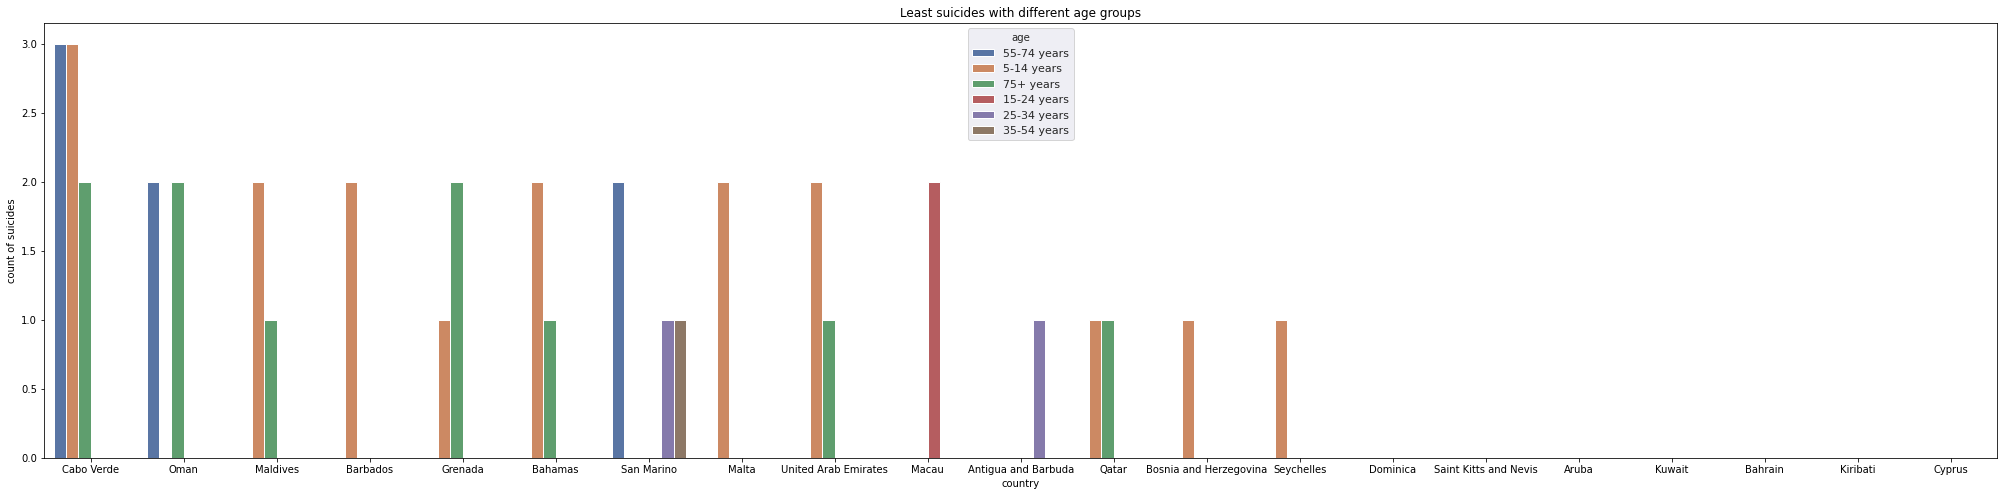

In [104]:
most_count_c=suicide_country_age.tail(50)
plt.figure(figsize=(35,8))
plt.title('Least suicides with different age groups')
sns.set(font_scale=1)
sns.barplot(x='country',y='suicides_no',hue='age',data=most_count_c)
plt.ylabel('count of suicides')
plt.show()


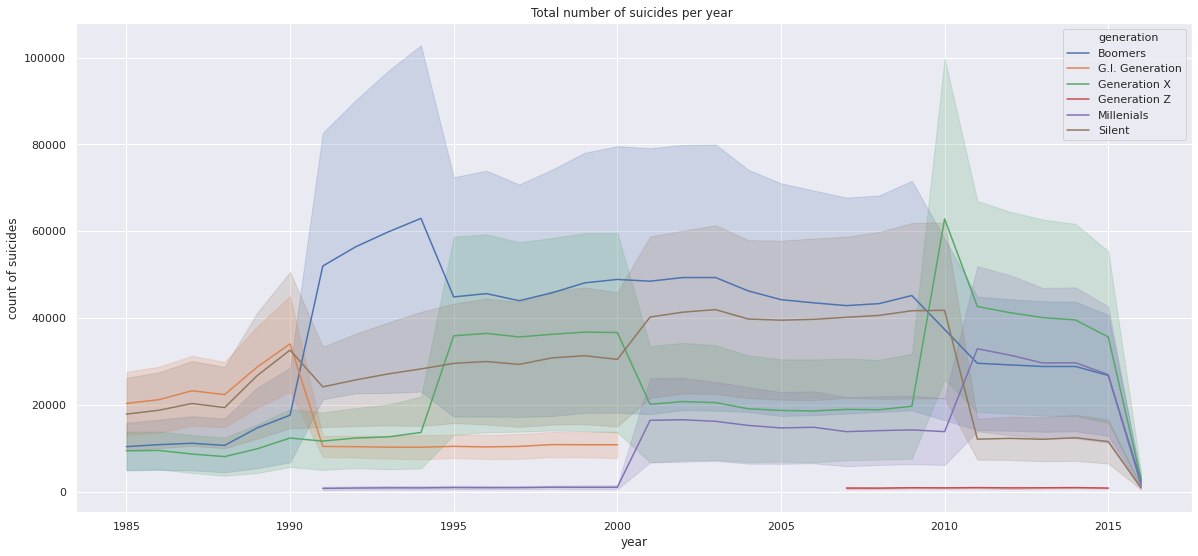

In [121]:
suicides_generation=data['suicides_no'].groupby([data['generation'],data['year'],data['sex']]).sum()

suicides_generation=suicides_generation.reset_index()
plt.figure(figsize=(20,9))
plt.title('Total number of suicides per year ')
sns.lineplot(x='year',y='suicides_no',hue='generation',data=suicides_generation)
plt.ylabel('count of suicides')
plt.show()

Text(0, 0.5, 'count of sucides')

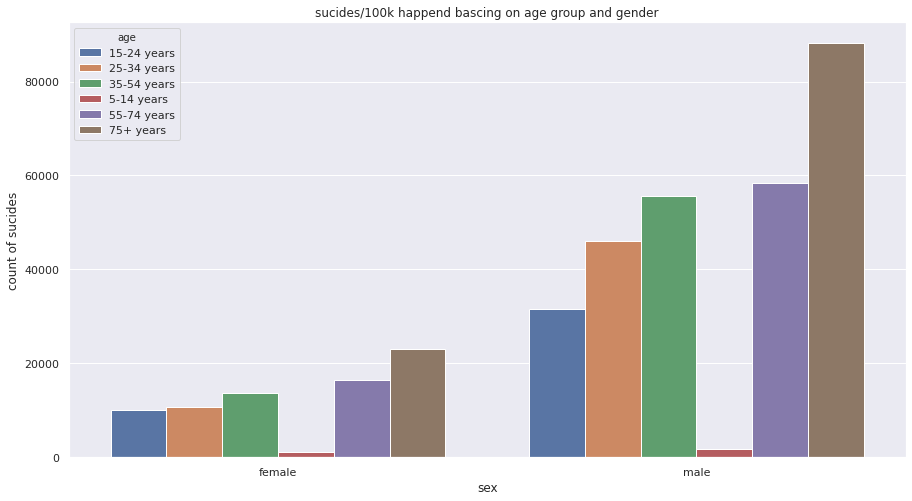

In [123]:
sucide__sex=pd.DataFrame(data['suicides/100k pop'].groupby([data['sex'],data['age']]).sum())
sucide__sex=sucide__sex.reset_index()
plt.figure(figsize=(15,8))
plt.title("sucides/100k happend bascing on age group and gender")
sns.barplot(x='sex',y='suicides/100k pop',hue='age',data=sucide__sex,estimator=sum)
plt.ylabel('count of sucides')


Text(0, 0.5, 'count of sucides')

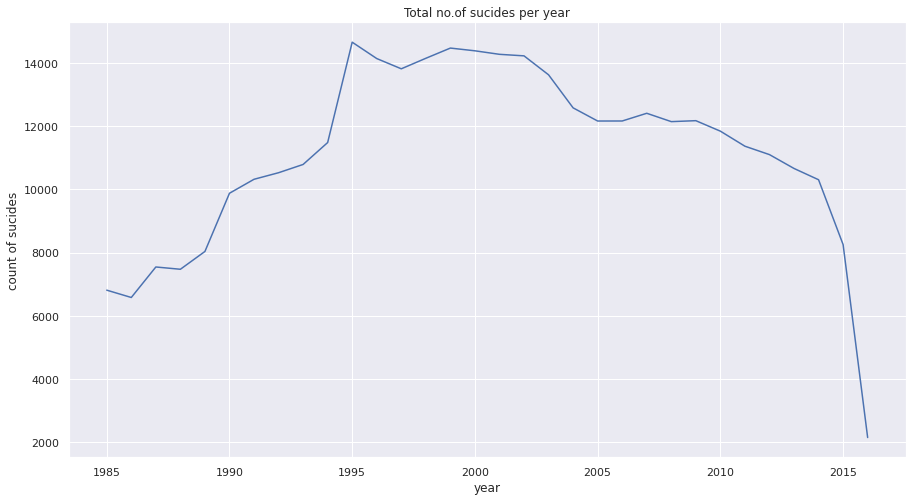

In [124]:
sucide__year=pd.DataFrame(data['suicides/100k pop'].groupby([data['year']]).sum())
sucide__year=sucide__year.reset_index()
plt.figure(figsize=(15,8))
plt.title('Total no.of sucides per year')
sns.lineplot(x='year',y='suicides/100k pop',data=sucide__year)
plt.ylabel('count of sucides')


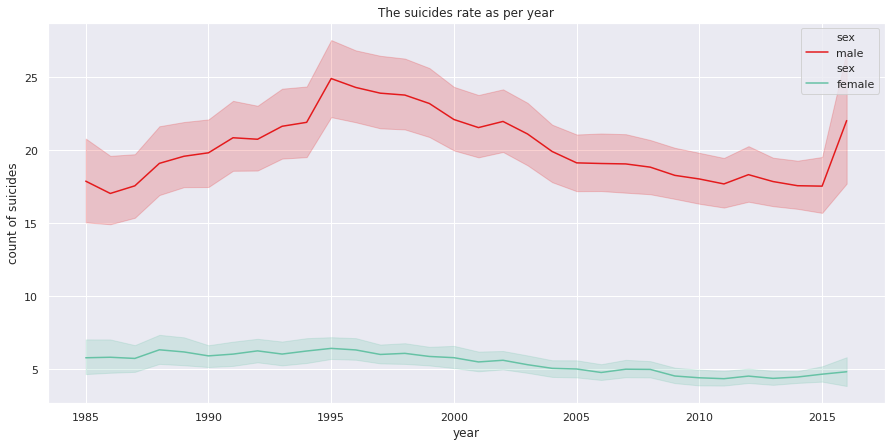

In [125]:
plt.figure(figsize=(15,7))
plt.title('The suicides rate as per year')
sns.lineplot(x='year',y='suicides/100k pop',hue='sex',data=male_population,palette='Set1')
sns.lineplot(x='year',y='suicides/100k pop',hue='sex',data=female_population,palette='Set2')
plt.ylabel('count of suicides')
plt.show()

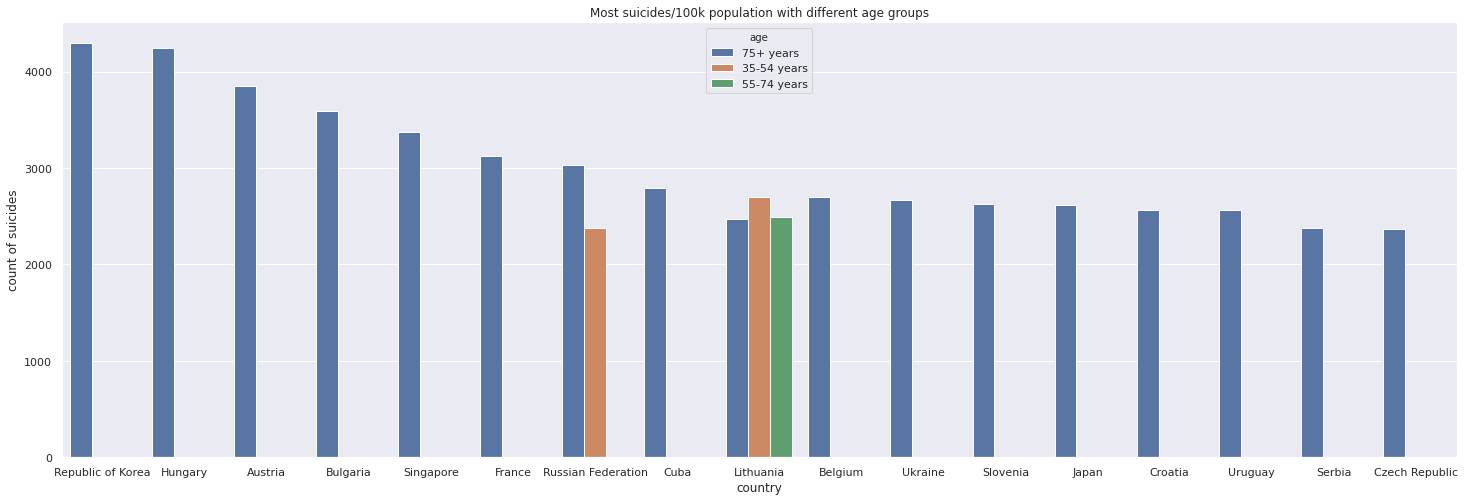

In [128]:
suicide__country_age =pd.DataFrame(data['suicides/100k pop'].groupby([data['country'],data['age']]).sum())
suicide__country_age=suicide__country_age.reset_index().sort_values(by='suicides/100k pop',ascending=False)
most_count_c=suicide__country_age.head(20)
plt.figure(figsize=(25,8))
plt.title('Most suicides/100k population with different age groups')
sns.barplot(x='country',y='suicides/100k pop',hue='age',data=most_count_c)
plt.ylabel('count of suicides')
plt.show()


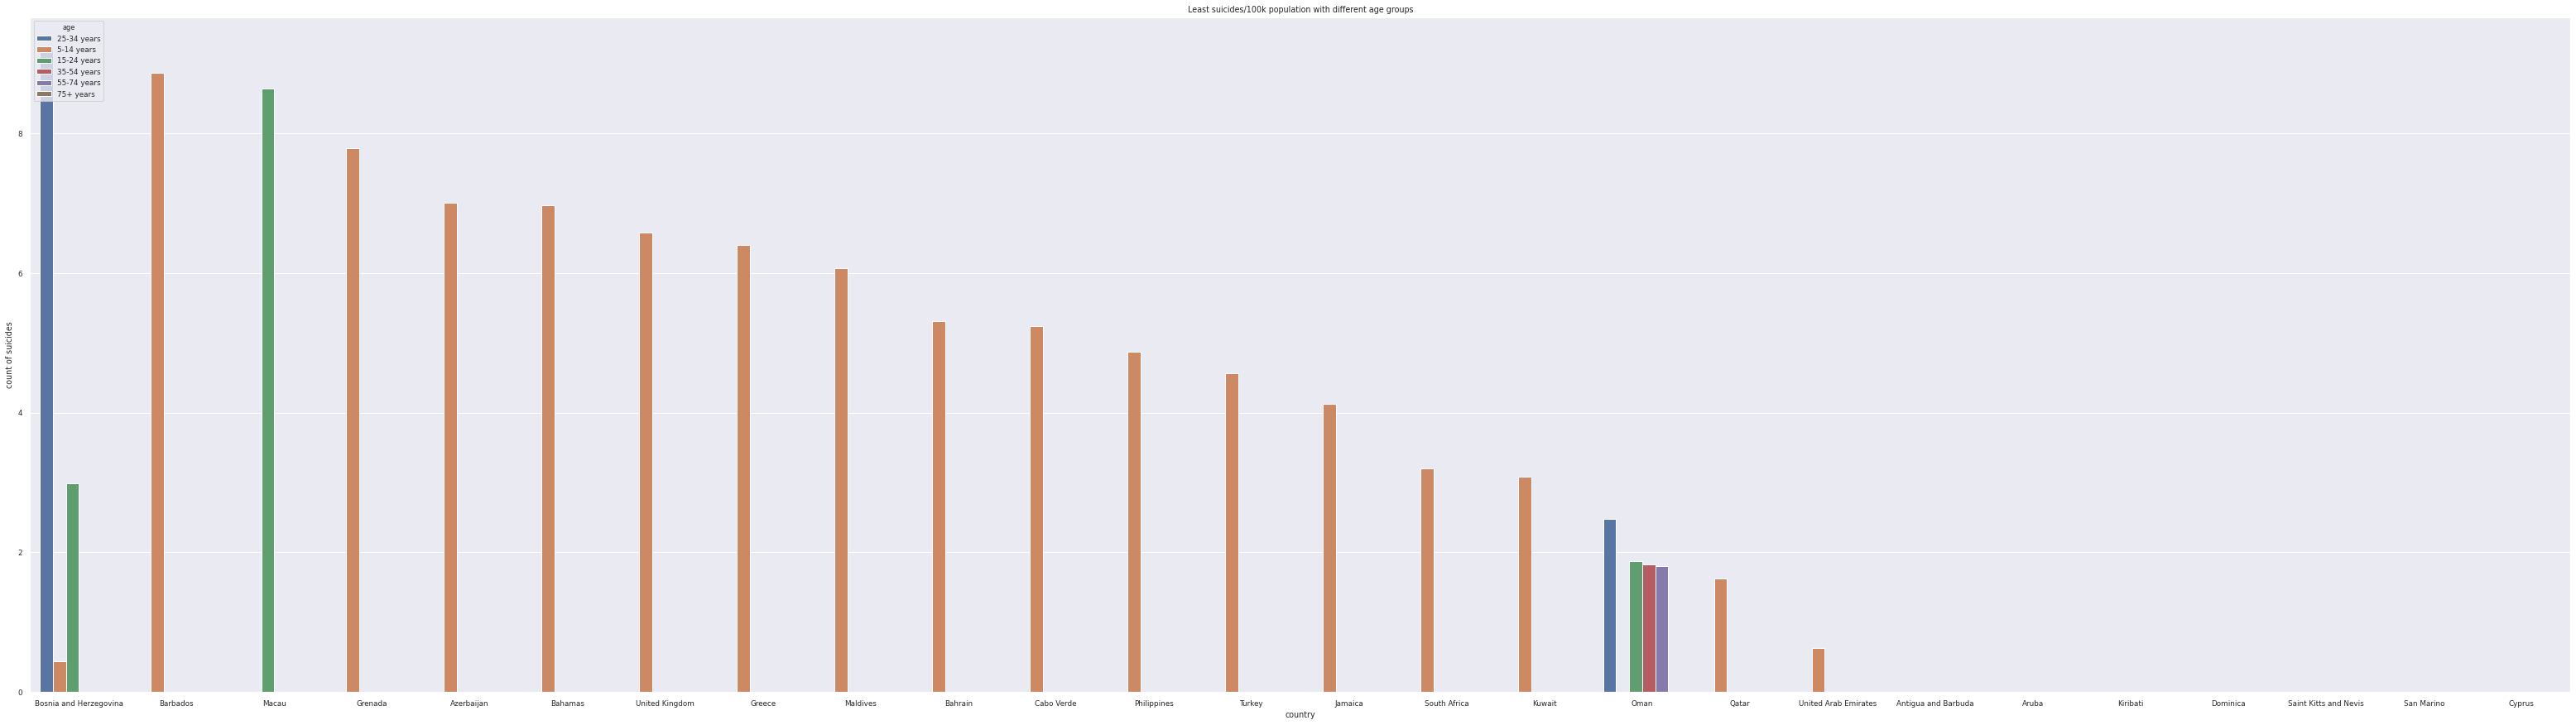

In [141]:
most_count_c=suicide__country_age.tail(50)
plt.figure(figsize=(55,15))
plt.title('Least suicides/100k population with different age groups')
sns.set(font_scale=0.8)
sns.barplot(x='country',y='suicides/100k pop',hue='age',data=most_count_c)
plt.ylabel('count of suicides')
plt.show()


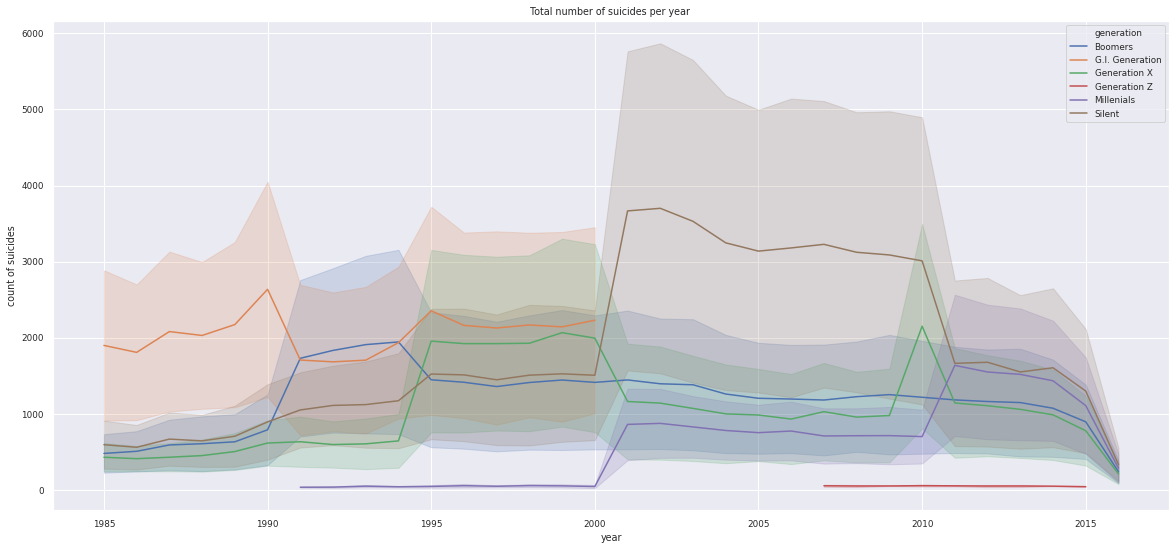

In [142]:
suicides__generation=data['suicides/100k pop'].groupby([data['generation'],data['year'],data['sex']]).sum()

suicides__generation=suicides__generation.reset_index()
plt.figure(figsize=(20,9))
plt.title('Total number of suicides/100k population per year ')
sns.lineplot(x='year',y='suicides/100k pop',hue='generation',data=suicides__generation)
plt.ylabel('count of suicides')
plt.show()